In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [13]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv')
transaction = pd.read_csv('QVI_transaction_data.csv')

<h1><center>Data preparation and customer analytics</center></h1>

<h3 style="color: darkorange;">  1. Tasks:</h3>

- Examine transaction data

- Examine customer data

- Data analysis and customer segments- any trends or insights

- Customer segments- which segments we should target

<h3 style="color: darkorange;"> 2. Data </h3>

1. QVI Purchase Behaviour

- LYLTY_CARD_NBR: loyalty card number

- LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

- PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

2. QVI Transaction data

- DATE: the date of the transaction

- STORE_NBR: the store number where the transaction occurs

- LYLTY_CARD_NBR: loyalty card number

- TXN_ID: transaction ID	

- PROD_NBR: product number (uniqe for each product)

- PROD_NAME: product name

- PROD_QTY: product quantity in each transaction	

- TOT_SALES: total sales from each transaction

<h3 style="color: darkorange;"> 3. Purchase Behaviour </h3>

In [14]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


---
**Questions:**

- What is the distribution of customers across different life stages?

- How many customers fall into each premium category (Premium, Mainstream, Budget)?

- What is the distribution of Premium customers across different life stages?

---

In [15]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
purchase.describe(include ='all').round(2)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,72637.00,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,136185.93,NaN,NaN
std,89892.93,NaN,NaN
min,1000.00,NaN,NaN
25%,66202.00,NaN,NaN
50%,134040.00,NaN,NaN
75%,203375.00,NaN,NaN


---
There's no null in the dataset.

LIFESTAGE has 7 categories and PREMIUM_CUSTOMER has 3 categories.

---

In [17]:
purchase['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [18]:
#set the theme
sns.set_theme(rc={'figure.figsize':(20,6)})
palette = ['#F3D5B5','#E7BC91','#D4A276','#BC8A5F','#A47148','#8B5E34','#6F4518','#603808','#583101']
sns.set_palette(palette)

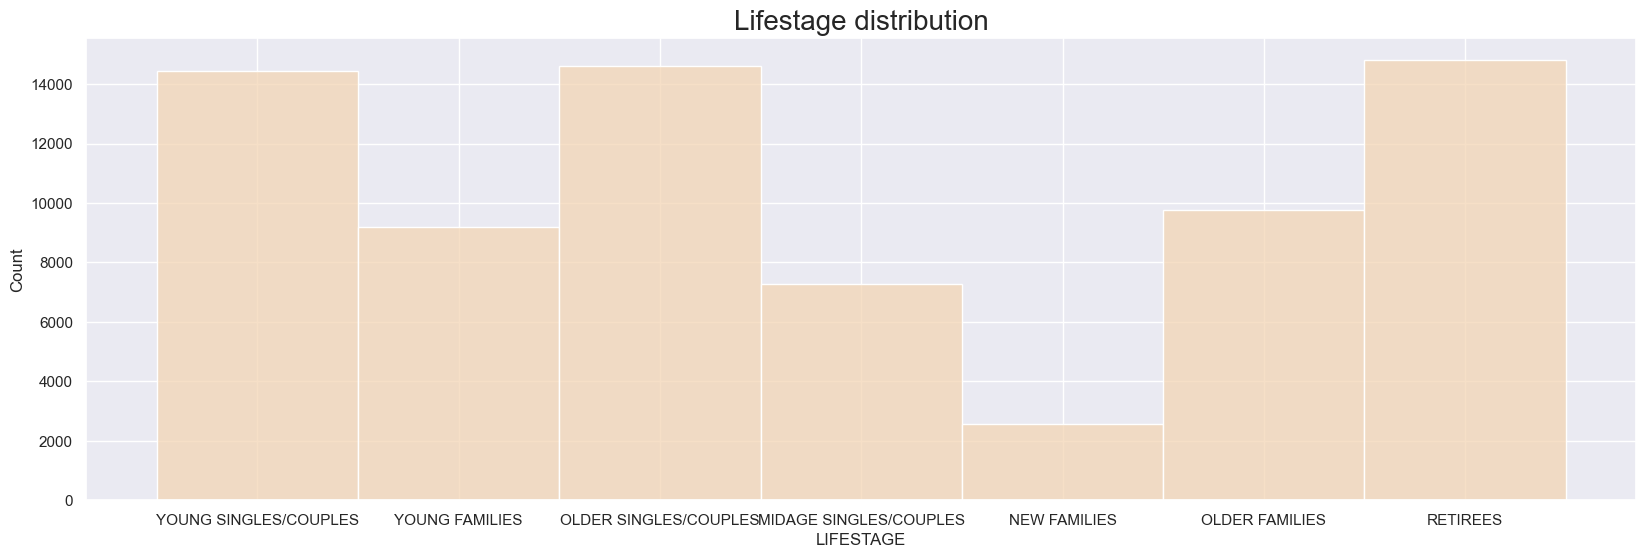

In [19]:
sns.histplot(purchase['LIFESTAGE'])
plt.title('Lifestage distribution', size = 20)
plt.show()

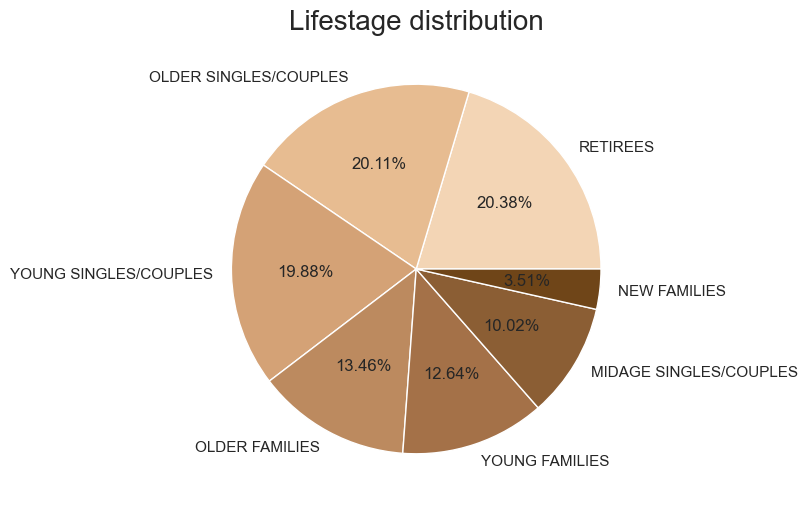

In [20]:
label1 = ['RETIREES',
'OLDER SINGLES/COUPLES',
'YOUNG SINGLES/COUPLES',
'OLDER FAMILIES',
'YOUNG FAMILIES',
'MIDAGE SINGLES/COUPLES',
'NEW FAMILIES']
plt.pie(purchase['LIFESTAGE'].value_counts(),labels = label1,autopct='%.2f%%')
plt.title('Lifestage distribution', size = 20)
plt.show()

---

3 largest group of customers are Retirees, Older singles/couples and young single/couples

---

In [21]:
purchase['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

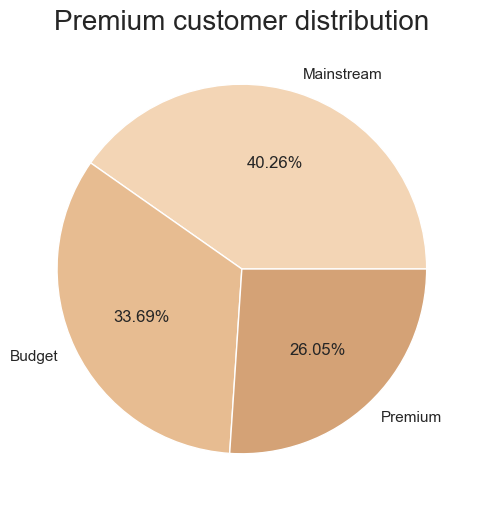

In [22]:
label2 = ['Mainstream','Budget','Premium']
plt.pie(purchase['PREMIUM_CUSTOMER'].value_counts(),labels = label2,autopct='%.2f%%')
plt.title('Premium customer distribution', size = 20)
plt.show()

---

Most of the customers are Mainstream customers (40%).

---

In [23]:
grouped = purchase.groupby('LIFESTAGE')['PREMIUM_CUSTOMER'].value_counts().reset_index()
grouped = grouped.sort_values(by=['LIFESTAGE','PREMIUM_CUSTOMER'], ascending=[True, False])
grouped.head()

,LIFESTAGE,PREMIUM_CUSTOMER,count
1,MIDAGE SINGLES/COUPLES,Premium,2431
0,MIDAGE SINGLES/COUPLES,Mainstream,3340
2,MIDAGE SINGLES/COUPLES,Budget,1504
5,NEW FAMILIES,Premium,588
4,NEW FAMILIES,Mainstream,849


In [24]:
total = purchase['LIFESTAGE'].value_counts()

In [25]:
pct = []
for i in ['MIDAGE SINGLES/COUPLES','NEW FAMILIES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']:
    for j in ['Premium','Mainstream','Budget']:
        percentage = grouped[(grouped['LIFESTAGE']==i)&(grouped['PREMIUM_CUSTOMER']==j)]['count']/total[i]
        pct.append(percentage)
pct=[series.iloc[0] for series in pct]
grouped['Pct']=pct
grouped.head()

,LIFESTAGE,PREMIUM_CUSTOMER,count,Pct
1,MIDAGE SINGLES/COUPLES,Premium,2431,0.334158
0,MIDAGE SINGLES/COUPLES,Mainstream,3340,0.459107
2,MIDAGE SINGLES/COUPLES,Budget,1504,0.206735
5,NEW FAMILIES,Premium,588,0.230679
4,NEW FAMILIES,Mainstream,849,0.333072


Text(0.5, 1.0, 'Premium customer distribution by Lifestage')

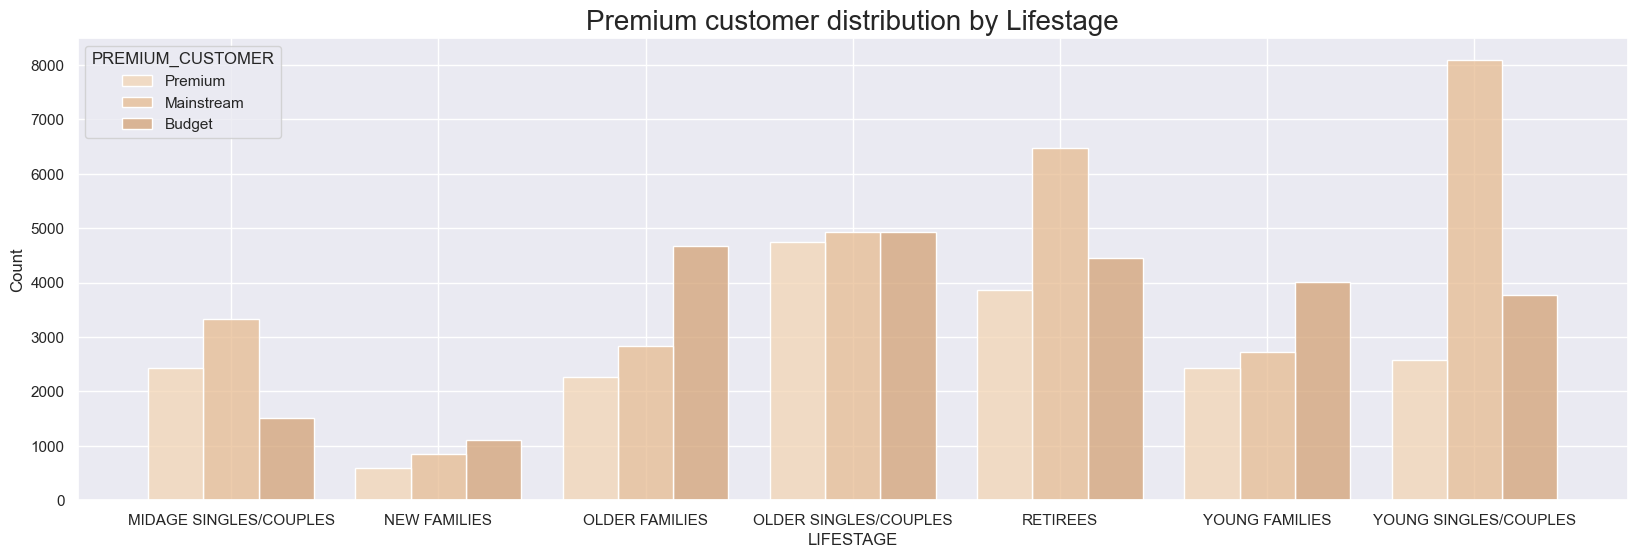

In [26]:
custom_order = ['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES', 
                'OLDER SINGLES/COUPLES', 'RETIREES', 'YOUNG FAMILIES', 
                'YOUNG SINGLES/COUPLES']
purchase['LIFESTAGE'] = pd.Categorical(purchase['LIFESTAGE'], categories=custom_order, ordered=True)
sns.histplot(x = purchase.sort_values(by=['LIFESTAGE'])['LIFESTAGE'], hue = purchase['PREMIUM_CUSTOMER'], multiple = 'dodge', shrink = 0.8)
plt.title('Premium customer distribution by Lifestage', size = 20)

Text(0.5, 1.0, 'Premium customer distribution by Lifestage')

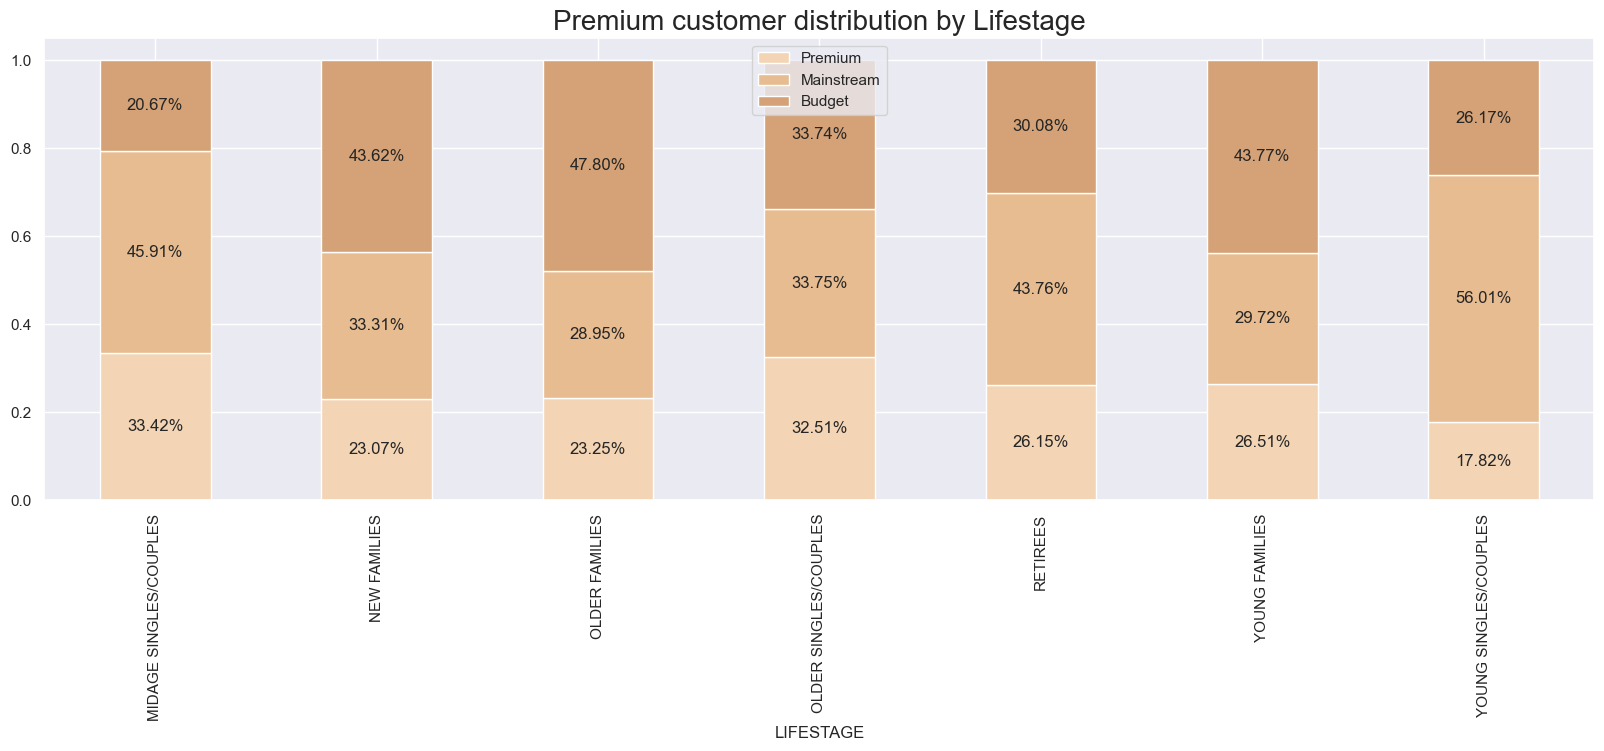

In [43]:
pivot_data = grouped.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='Pct', aggfunc='sum')
pivot_data=pivot_data[['Premium', 'Mainstream', 'Budget']]
ax = pivot_data.sort_index().plot(kind='bar', stacked=True)

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y() + height / 2
    
    # Label with percentage, rounding to 2 decimal places
    ax.text(x + width / 2, y, f'{height:.2%}', ha='center', va='center')
ax.legend(loc='upper center')
plt.title('Premium customer distribution by Lifestage', size = 20)

---

- Customer who have a family (young family, new family and old family) are mostly budget customers.

- Customer who are single or have a partner but no kids, customers who have retired (young singles/couples, midage singles/couples, older singles/ couples) are mostly Mainstream customers.

- Young singles/couples has the highest number of mainstream customers (more than half of Young singles/couples are mainstream customers).

- Older singles/couples customers are equally spread among Budget, Mainstream and Premium

- Mainstream Young singles/couples is the segments with highest number of customers, following by Mainstream Retireers.

---

<h3 style="color: darkorange;"> 4. Transaction Data </h3>

In [44]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


---

**Questions:**

- Assessing all the stores total sales daily, are there any seasonal pattern or outliers? (DATE & TOT_SALES)
- Which store has the highest total sales over the period? (STORE_NBR & TOT_SALES)
- Which store has the highest number of customer over the period? (STORE_NBR & LYLTY_CARD_NBR)
- Which product has the highest total sales and highest sold quantity? (PROD_NAME, PROD_QTY & TOT_SALES)
- Which chip brand has the highest total sales or highest sold quantity? (Brand & TOT_SALES)
- How many chip packages does a customer usually bought in one transaction? (PROD_QTY)
- Others

---

In [45]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [46]:
transaction.describe(include = 'all').round(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836.00,264836.00,264836.00,264836.00,264836.00,264836,264836.00,264836.00
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.04,135.08,135549.48,135158.31,56.58,NaN,1.91,7.30
std,105.39,76.78,80579.98,78133.03,32.83,NaN,0.64,3.08
min,43282.00,1.00,1000.00,1.00,1.00,NaN,1.00,1.50
25%,43373.00,70.00,70021.00,67601.50,28.00,NaN,2.00,5.40
50%,43464.00,130.00,130357.50,135137.50,56.00,NaN,2.00,7.40
75%,43555.00,203.00,203094.25,202701.25,85.00,NaN,2.00,9.20


- There's no null in the dataset

- Should change date format for better intepretation

- PROD_QTY have a large range (min 2 and max 200) so there's potential outliers that might affect the analysis.

In [47]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'],origin='1899-12-30', unit='D')

In [48]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [49]:
transaction = transaction.sort_values('DATE') #sort the data by date
counts = transaction['DATE'].value_counts().reset_index()
counts.sort_values('DATE')

,DATE,count
181,2018-07-01,724
245,2018-07-02,711
195,2018-07-03,722
228,2018-07-04,714
238,2018-07-05,712
...,...,...
194,2019-06-26,723
257,2019-06-27,709
153,2019-06-28,730
90,2019-06-29,745


<Axes: xlabel='DATE', ylabel='Count'>

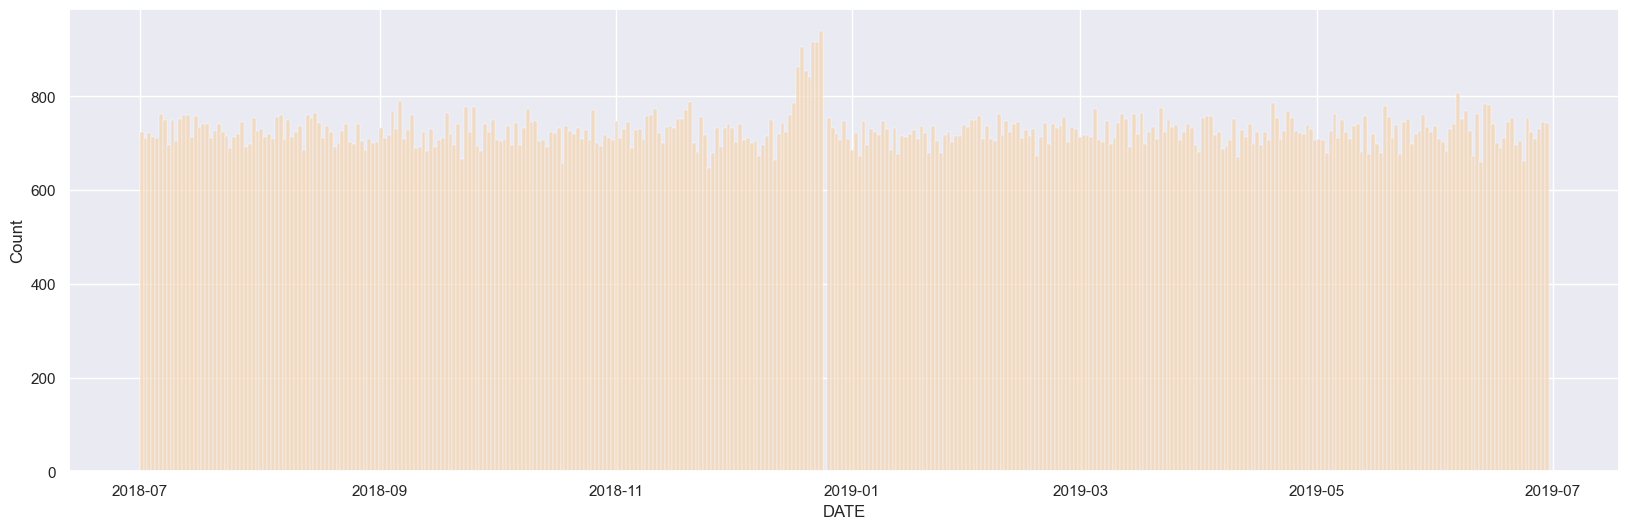

In [50]:
sns.histplot(transaction['DATE'],bins = 365)

--- 
The highest number of transaction occurs at the end of the year (Christmas Eve). Moreover,there's a day with no sale data.

---

In [51]:
transaction['DATE'].nunique()

364

The data is collected in a year (missing one day- the store might close that day)

In [52]:
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(transaction['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

On Christmas (2018-12-25), the store closed so there was no data.

In [53]:
transaction['STORE_NBR'].nunique()

272

There are 272 stores in total.

In [54]:
transaction['LYLTY_CARD_NBR'].nunique() #matches with the purchase dataset

72637

In [55]:
transaction['PROD_QTY'].value_counts()

PROD_QTY
2      236039
1       27518
5         450
3         430
4         397
200         2
Name: count, dtype: int64

In [56]:
outlier = transaction[transaction['PROD_QTY'] == 200]
outlier

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [57]:
customer_outlier = transaction[transaction['LYLTY_CARD_NBR']== 226000]
customer_outlier

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There's one customer that buy 200 Dorito Corn Chp Supreme 380g twice during the period. He or she might be a retailer, buying the chips to sell at his or her store. I will remove this because bulk buying is not common.

In [58]:
transaction = transaction.drop([69762,69763])

In [59]:
transaction['PROD_QTY'].value_counts()

PROD_QTY
2    236039
1     27518
5       450
3       430
4       397
Name: count, dtype: int64

---

Most customers buy 2 packages of chip per transactions. 

---

In [60]:
print(transaction['PROD_NAME'].nunique())
transaction['PROD_NAME'].value_counts()

114


PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

---

There are 114 products in total.

---

In [61]:
transaction['Weight'] = transaction['PROD_NAME'].apply(lambda x: x.split()[-1])
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight
100938,2018-07-01,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134g
65566,2018-07-01,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180g
43733,2018-07-01,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,110g
175455,2018-07-01,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150g
205813,2018-07-01,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150g
...,...,...,...,...,...,...,...,...,...
40823,2019-06-30,97,97085,96824,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110g
249581,2019-06-30,148,148317,148317,112,Tyrrells Crisps Ched & Chives 165g,1,4.2,165g
78296,2019-06-30,212,212068,210874,113,Twisties Chicken270g,2,9.2,Chicken270g
121166,2019-06-30,55,55029,48630,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,110g


The product are not labelled in a uniform format. I will do some editing for easier interpretation and analysis.

In [62]:
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Twisties Chicken270g', 
    'Twisties Chicken 270g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Natural Chip        Compny SeaSalt175g', 
    'Natural Chip        Compny SeaSalt 175g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Natural ChipCo      Hony Soy Chckn175g', 
    'Natural ChipCo      Hony Soy Chckn 175g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Old El Paso Salsa   Dip Chnky Tom Ht300g', 
    'Old El Paso Salsa   Dip Chnky Tom Ht 300g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Smiths Crinkle Cut  Chips Chs&Onion170g', 
    'Smiths Crinkle Cut  Chips Chs&Onion 170g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Smiths Thinly       Swt Chli&S/Cream175G', 
    'Smiths Thinly       Swt Chli&S/Cream 175g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Smiths Chip Thinly  CutSalt/Vinegr175g', 
    'Smiths Chip Thinly  CutSalt/Vinegr 175g')
transaction['PROD_NAME'] = transaction['PROD_NAME'].replace(
    'Kettle 135g Swt Pot Sea Salt', 
    'Kettle Swt Pot Sea Salt 135g')
transaction['Weight'] = transaction['PROD_NAME'].apply(lambda x: x.split()[-1])
transaction['Brand'] = transaction['PROD_NAME'].apply(lambda x: x.split()[0])

In [63]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand
100938,2018-07-01,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134g,Pringles
65566,2018-07-01,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180g,GrnWves
43733,2018-07-01,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,110g,Infuzions
175455,2018-07-01,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150g,Kettle
205813,2018-07-01,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150g,RRD
...,...,...,...,...,...,...,...,...,...,...
40823,2019-06-30,97,97085,96824,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110g,Cobs
249581,2019-06-30,148,148317,148317,112,Tyrrells Crisps Ched & Chives 165g,1,4.2,165g,Tyrrells
78296,2019-06-30,212,212068,210874,113,Twisties Chicken 270g,2,9.2,270g,Twisties
121166,2019-06-30,55,55029,48630,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,110g,Cobs


In [64]:
weight_totalsales = transaction.groupby('Weight')['PROD_QTY'].sum().reset_index()
weight = weight_totalsales.sort_values(by = 'PROD_QTY', ascending=False)
weight['Weight'].unique()

array(['175g', '150g', '134g', '110g', '170g', '165g', '300g', '330g',
       '380g', '270g', '200g', '135g', '250g', '210g', '210G', '90g',
       '190g', '160g', '220g', '70g', '150G', '180g', '125g'],
      dtype=object)

Some of the weight are labeled incorrectly (G instead of g)

In [65]:
transaction['Weight'] = transaction['Weight'].replace(
    '210G', 
    '210g')
transaction['Weight'] = transaction['Weight'].replace(
    '150G', 
    '150g')
weight_totalsales = transaction.groupby('Weight')['PROD_QTY'].sum().reset_index()
weight = weight_totalsales.sort_values(by = 'PROD_QTY', ascending=False)
print(weight.head())
weight['Weight'].unique()

  Weight  PROD_QTY
8   175g    126467
4   150g     82174
2   134g     48019
0   110g     42835
7   170g     38088


array(['175g', '150g', '134g', '110g', '170g', '165g', '300g', '330g',
       '380g', '270g', '210g', '200g', '135g', '250g', '90g', '190g',
       '160g', '220g', '70g', '180g', '125g'], dtype=object)

---
Most of the chips sold during the period are 175g, following by 150g and 134g. 

---

In [66]:
prod_weight_count = []

for i in weight['Weight'].unique():
    count = transaction[transaction['Weight']==i]['PROD_NAME'].unique().shape[0]
    prod_weight_count.append(count)
pd.DataFrame(data = [weight['Weight'].unique(),prod_weight_count]).T.head()

,0,1
0,175g,30
1,150g,20
2,134g,8
3,110g,7
4,170g,9


In [67]:
transaction['PROD_NAME'].nunique()

114

---

With further investigation, 30 out of 114 products have a weight of 175g. So the 175g chip has the highest sold quantity might not entirely due to the customers prefer that weight. Hence, further investigation (survey for example) is required to make any further conclusion about the prefer weight. 

---

In [68]:
transaction['Brand'] = transaction['PROD_NAME'].apply(lambda x: x.split()[0])

In [69]:
brand_totalsales = transaction.groupby('Brand')['PROD_QTY'].sum().reset_index()
brand_totalsales = brand_totalsales.sort_values(by = 'PROD_QTY')
brand_totalsales

,Brand,PROD_QTY
7,French,2643
13,NCC,2682
22,Sunbites,2706
9,GrnWves,2764
0,Burger,2970
21,Snbts,2986
2,Cheetos,5530
19,Smith,5609
11,Infzns,6000
5,Dorito,6109


Some brands are written in multiple ways. I will change them to the same format.

NCC = Natural (Natural Chip Co) 

RRD = Red (Red Rock Deli)

Snbts = Sunbites

Infzns = Infuzions

Grain = GrnWves 

WW = Woolworths

Dorito = Doritos

In [70]:
transaction['Brand'] = transaction['Brand'].replace(
    'NCC', 
    'Natural')
transaction['Brand'] = transaction['Brand'].replace(
    'RRD', 
    'Red')
transaction['Brand'] = transaction['Brand'].replace(
    'Snbts', 
    'Sunbites')
transaction['Brand'] = transaction['Brand'].replace(
    'Infzns', 
    'Infuzions')
transaction['Brand'] = transaction['Brand'].replace(
    'Grain', 
    'GrnWves')
transaction['Brand'] = transaction['Brand'].replace(
    'WW', 
    'Woolworths')
transaction['Brand'] = transaction['Brand'].replace(
    'Dorito', 
    'Doritos')

In [71]:
transaction['Price'] = transaction['TOT_SALES']/transaction['PROD_QTY']

In [72]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Price
100938,2018-07-01,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134g,Pringles,3.7
65566,2018-07-01,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180g,GrnWves,3.1
43733,2018-07-01,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,110g,Infuzions,3.8
175455,2018-07-01,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150g,Kettle,4.6
205813,2018-07-01,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150g,Red,2.7
...,...,...,...,...,...,...,...,...,...,...,...
40823,2019-06-30,97,97085,96824,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110g,Cobs,3.8
249581,2019-06-30,148,148317,148317,112,Tyrrells Crisps Ched & Chives 165g,1,4.2,165g,Tyrrells,4.2
78296,2019-06-30,212,212068,210874,113,Twisties Chicken 270g,2,9.2,270g,Twisties,4.6
121166,2019-06-30,55,55029,48630,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,110g,Cobs,3.8


Text(0.5, 1.0, 'Total sales by date')

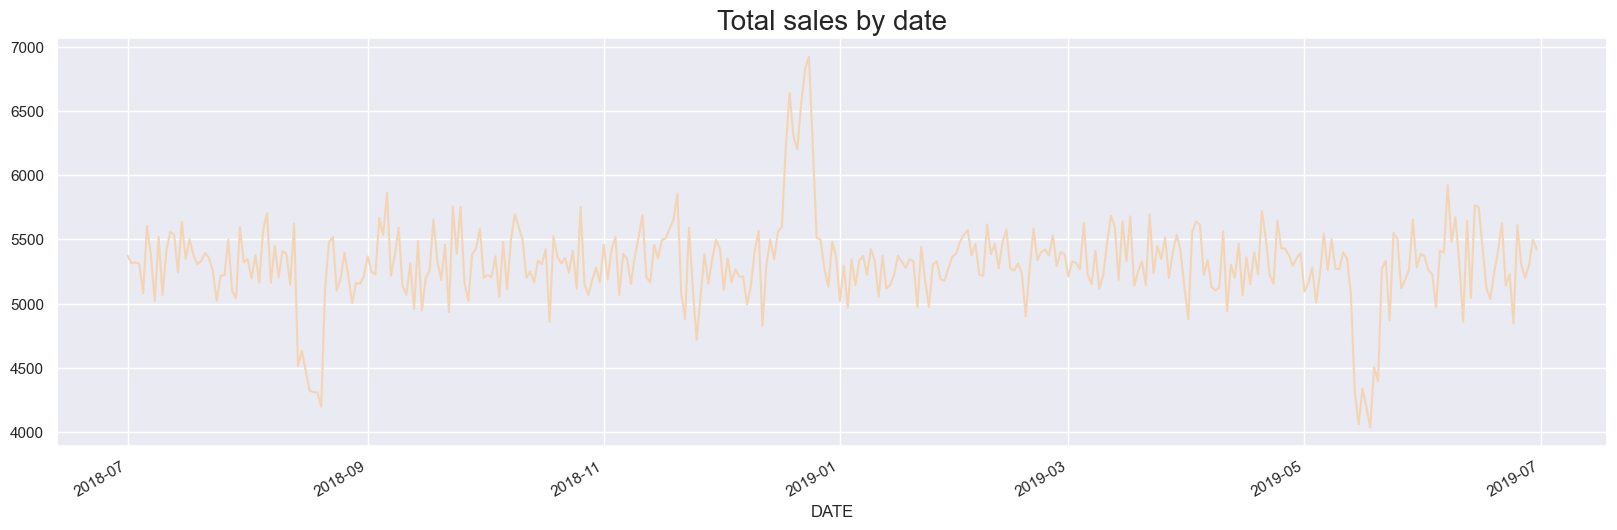

In [73]:
seasonality = transaction.groupby('DATE')['TOT_SALES'].sum()
seasonality.plot()
plt.title('Total sales by date', size = 20)

In [118]:
seasonality.mean()

5310.755494505494

In [75]:
seasonality.sort_values().head(15)

DATE
2019-05-18    4036.50
2019-05-15    4060.30
2019-05-17    4192.45
2018-08-20    4198.20
2018-08-19    4309.75
2019-05-14    4310.45
2018-08-18    4312.00
2018-08-17    4324.55
2019-05-16    4340.05
2019-05-20    4396.45
2018-08-16    4476.60
2019-05-19    4504.15
2018-08-14    4516.25
2018-08-15    4634.80
2018-11-25    4718.50
Name: TOT_SALES, dtype: float64

___

As mentioned above, sales surged near Christmas. Moreover, there are two period in this year that sales dropped. The first period was from 2018-08-14 to 2018-08-20 and the second period was from 2019-05-14 to 2019-05-20. These 'dropped' period lasted for the same time on the same date in August and May. This can be due to seasonality which requires more data to assess. 

___

In [76]:
store_qty = transaction.groupby('STORE_NBR')['PROD_QTY'].sum().reset_index()
store_qty = store_qty.sort_values(by="PROD_QTY", ascending = False)
store_qty

,STORE_NBR,PROD_QTY
225,226,4001
87,88,3718
92,93,3639
164,165,3602
42,43,3519
...,...,...
210,211,2
205,206,2
251,252,2
91,92,2


In [77]:
store_qty[store_qty['PROD_QTY'] <10]

,STORE_NBR,PROD_QTY
84,85,5
192,193,4
30,31,4
10,11,2
210,211,2
205,206,2
251,252,2
91,92,2
75,76,2


---

Store 226 has the highest number of chips sold (4401 units), following by store 88. This can be due to the store's location or marketing strategy or the skills of the employees (better training/ employees with many years of experience).

There are nine stores sold less than 10 units during the period. These stores might be placed in rural area or they are really small so they only sell a few unit of each products (not only chips) or they have closed during this period. More information about these stores can be helpful to assess the reason behind significant low sales. 

---

In [78]:
store_totsales = transaction.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()
store_totsales = store_totsales.sort_values(by='TOT_SALES', ascending = False)
store_totsales

,STORE_NBR,TOT_SALES
225,226,17605.45
87,88,16333.25
164,165,15973.75
39,40,15559.50
236,237,15539.50
...,...,...
205,206,7.60
251,252,7.40
10,11,6.70
75,76,6.00


In [79]:
store_totsales.head(20)

,STORE_NBR,TOT_SALES
225,226,17605.45
87,88,16333.25
164,165,15973.75
39,40,15559.50
236,237,15539.50
57,58,15251.45
198,199,14797.00
3,4,14647.65
202,203,14551.60
25,26,14469.30


--- 

Store 226 and 88 are the stores with the highest revenue over the period. However, for store 93 and 43, despite the high sales volume (top 5), their revenue are not in the top 20 stores. This might be due to most customer buying cheaper chips compare to other stores.

---

In [80]:
product_qty = transaction.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index()
product_qty = product_qty.sort_values(by='PROD_QTY', ascending = False)
product_qty

,PROD_NAME,PROD_QTY
32,Kettle Mozzarella Basil & Pesto 175g,6381
42,Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309
8,Cobs Popd Sea Salt Chips 110g,6277
10,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256
98,Tostitos Splash Of Lime 175g,6234
...,...,...
62,RRD Pc Sea Salt 165g,2702
112,Woolworths Medium Salsa 300g,2700
43,NCC Sour Cream & Garden Chives 175g,2682
105,WW Crinkle Cut Original 175g,2666


Text(0.5, 1.0, 'Total sold quantity by product')

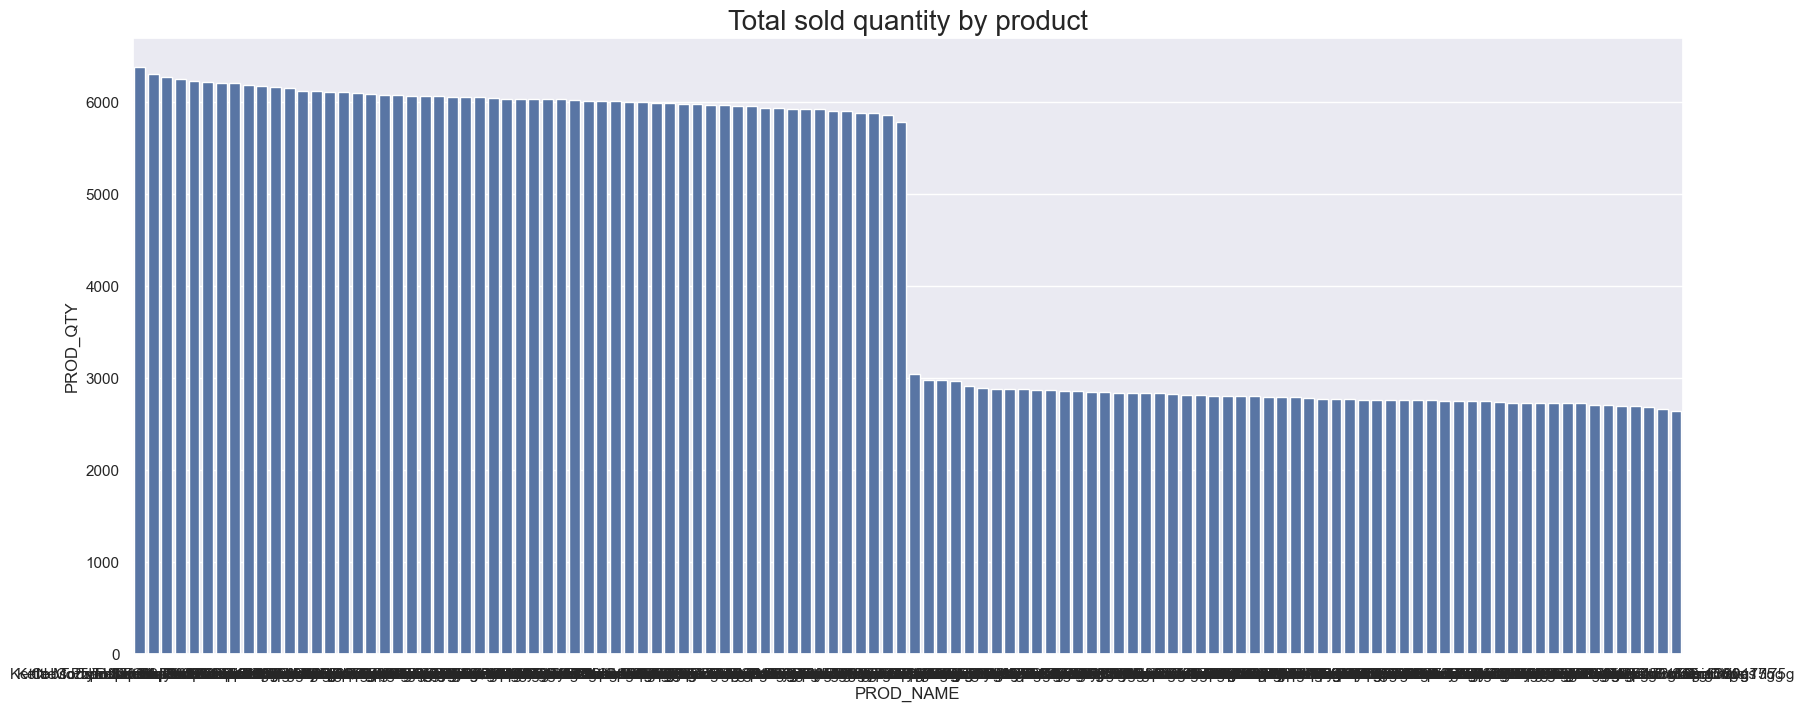

In [81]:
sns.set_theme(rc={'figure.figsize':(20,8)})
sns.barplot(x = product_qty['PROD_NAME'], y = product_qty['PROD_QTY'])
plt.title('Total sold quantity by product', size = 20)

In [82]:
count1 = product_qty[product_qty['PROD_QTY']>5000]
count1.count()

PROD_NAME    57
PROD_QTY     57
dtype: int64

In [83]:
count2 = product_qty[product_qty['PROD_QTY']<3000]
count2.count()

PROD_NAME    56
PROD_QTY     56
dtype: int64

---
Kettle Mozzarella Basil & Pesto 175g has the highest sold quantity over the period, following by Kettle Mozzarella Basil & Pesto 175g, whereas French Fries Potato Chips 175g 300g has the lowest.

Half (57 products) of the products have sold quantity higher than 5000 units. The other half (56 products) have sold quantity lower than 3000 units. From the bar plot, it's clear that the sales of these chips are split into two groups: sales around 3000 units and sales around 6000 units. This shows a clear market segmentation, further analysis can be done to assess the potential factors (branding, flavour, pricing, etc.).

---

In [84]:
brand_qty = transaction.groupby('Brand')['PROD_QTY'].sum().reset_index()
brand_qty = brand_qty.sort_values(by = 'PROD_QTY', ascending = False)
brand_qty

,Brand,PROD_QTY
9,Kettle,79051
15,Smiths,54730
5,Doritos,53816
12,Pringles,48019
13,Red,33646
21,Woolworths,27856
8,Infuzions,27119
17,Thins,26929
4,Cobs,18571
18,Tostitos,18134


Text(0.5, 1.0, 'Total sold quantity by brand')

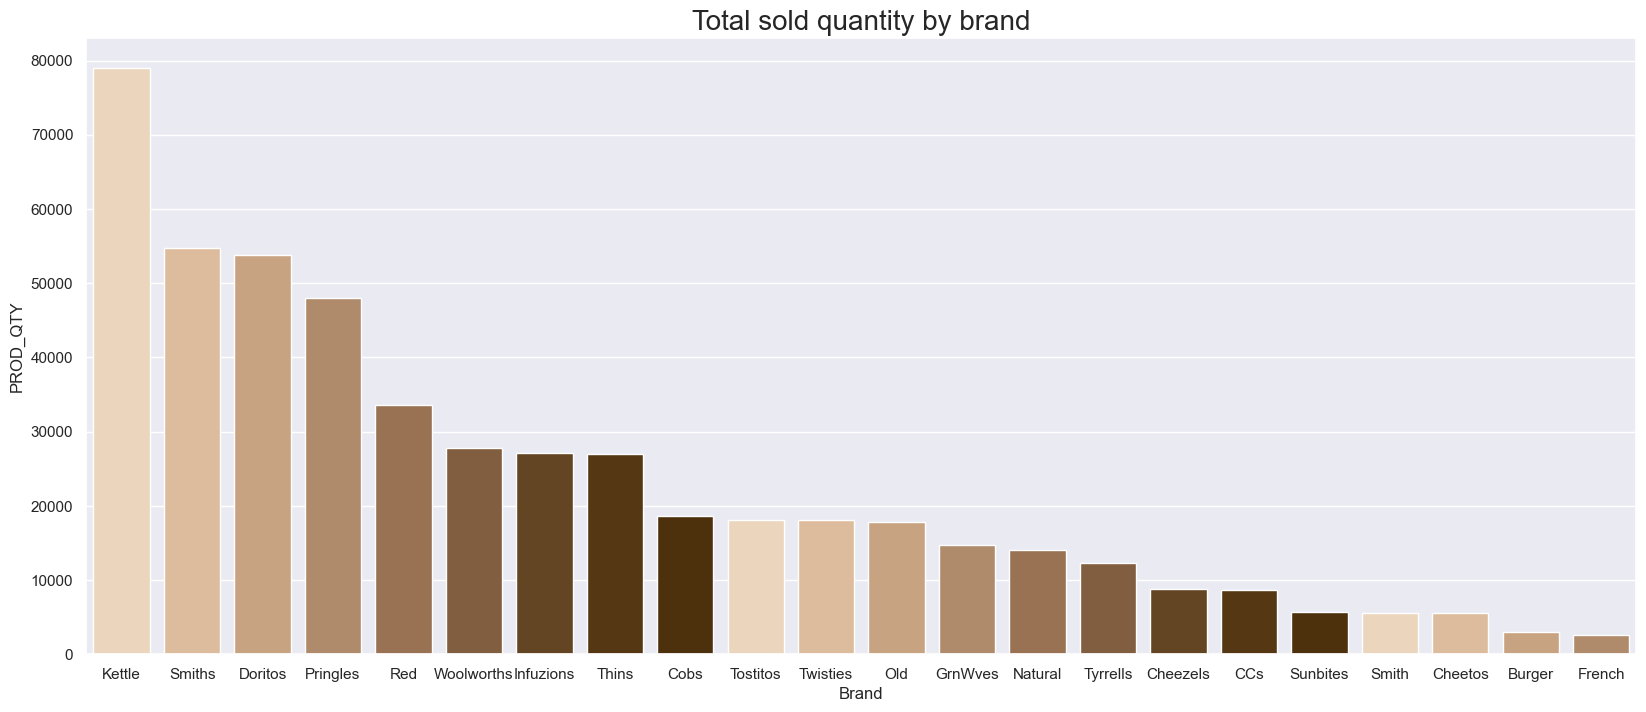

In [85]:
sns.barplot(x = brand_qty['Brand'], y = brand_qty['PROD_QTY'],palette =palette)
plt.title('Total sold quantity by brand', size = 20)

---
Kettle has the highest sales compare to other brands with the top two flavours being Kettle Tortilla ChpsHny&Jlpno Chili 150g and Kettle Mozzarella Basil & Pesto 175g (based on product_totalsales). Conversely, French Fries has the lowest sales which might be because the brand only has one product- French Fries Potato Chips 175g.

---

In [86]:
brand_totsales = transaction.groupby('Brand')['TOT_SALES'].sum().reset_index()
brand_totsales = brand_totsales.sort_values(by = 'TOT_SALES', ascending = False)
brand_totsales

,Brand,TOT_SALES
9,Kettle,390239.8
5,Doritos,240590.9
15,Smiths,210076.8
12,Pringles,177655.5
8,Infuzions,99047.6
13,Red,95046.0
11,Old,90785.1
17,Thins,88852.5
19,Twisties,81522.1
18,Tostitos,79789.6


Text(0.5, 1.0, 'Total sales by brand')

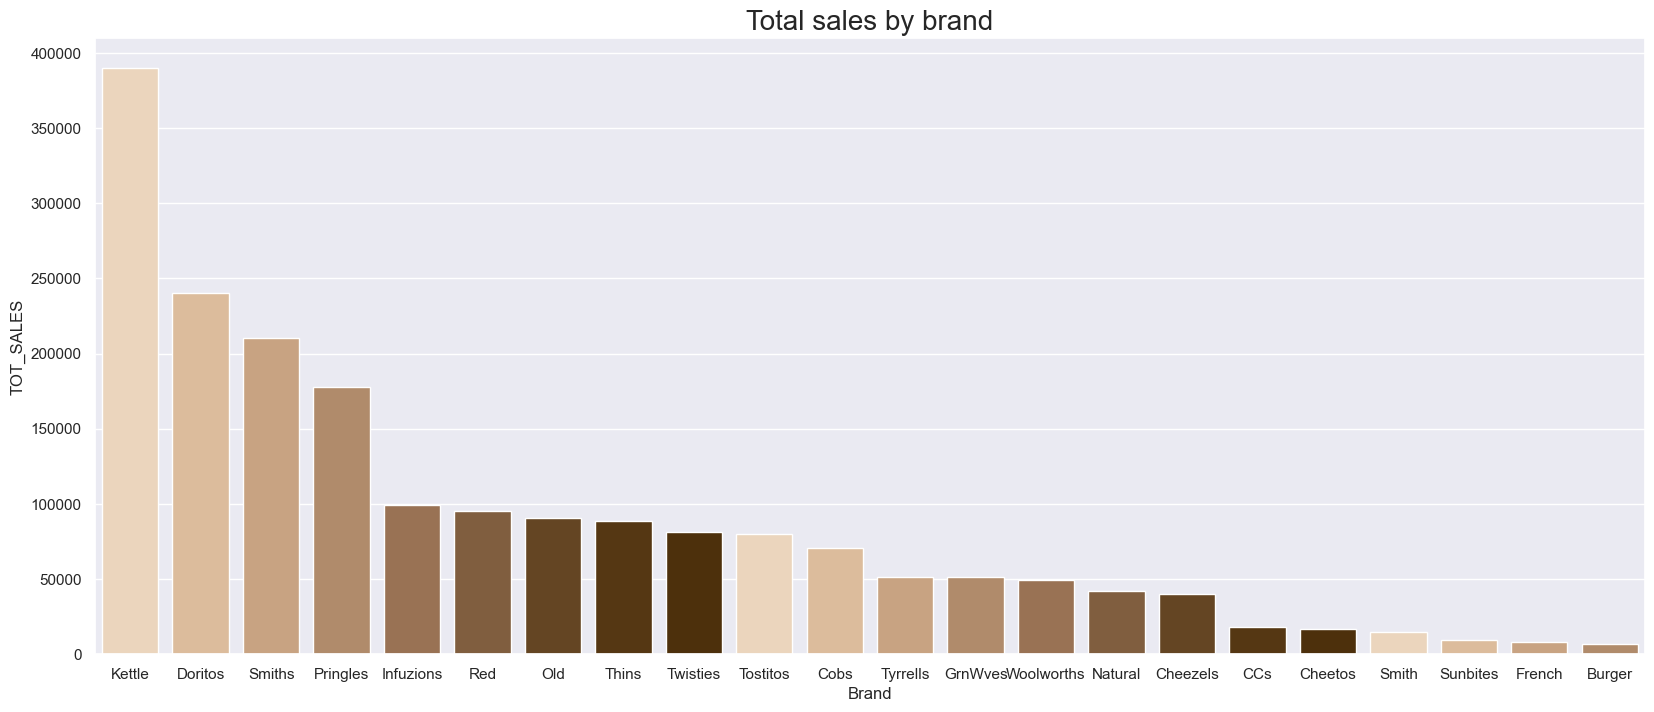

In [87]:
sns.barplot(x = brand_totsales['Brand'], y = brand_totsales['TOT_SALES'],palette =palette)
plt.title('Total sales by brand', size = 20)

---

Kettle has the highest revenue following by Dorritos and Smiths. Burger, French and Sunbites have the lowest revenue during the period.


---

In [88]:
prod_price = transaction.groupby('PROD_NAME')['Price'].mean().reset_index()
prod_price = prod_price.sort_values(by='Price', ascending = False)
prod_price.describe()

,Price
count,114.000000
mean,3.490819
std,1.134291
min,1.500000
25%,2.700000
50%,3.300000
75%,4.399829
max,6.368285


In [89]:
prod_price

,PROD_NAME,Price
11,Dorito Corn Chp Supreme 380g,6.368285
86,Smiths Crnkle Chip Orgnl Big Bag 380g,5.900000
12,Doritos Cheese Supreme 330g,5.700000
76,Smiths Crinkle Original 330g,5.700000
77,Smiths Crinkle Chips Salt & Vinegar 330g,5.700000
...,...,...
89,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1.700000
104,WW Crinkle Cut Chicken 175g,1.700000
105,WW Crinkle Cut Original 175g,1.700000
112,Woolworths Medium Salsa 300g,1.500000


---

The chips have an average price of `$3.50` with Dorito Corn Chp Supreme 380g being the most expensive (`$6.37`). Woolworths Medium Salsa 300g and Woolworths Mild Salsa 300g are the cheapest (`$1.50`).

---

<h3 style="color: darkorange;"> 5. Purchase and Transaction </h3>

Merge the Purchase and Transaction table together using LYLTY_CARD_NBR.

In [90]:
merged = pd.merge(transaction, purchase, on = ['LYLTY_CARD_NBR','LYLTY_CARD_NBR'], how = 'inner') 
#use inner to eliminate any null data
merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,Brand,Price,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134g,Pringles,3.7,OLDER SINGLES/COUPLES,Mainstream
1,2018-08-19,19,19205,16467,63,Kettle Swt Pot Sea Salt 135g,2,8.4,135g,Kettle,4.2,OLDER SINGLES/COUPLES,Mainstream
2,2018-09-18,19,19205,16468,88,Kettle Honey Soy Chicken 175g,2,10.8,175g,Kettle,5.4,OLDER SINGLES/COUPLES,Mainstream
3,2018-07-01,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180g,GrnWves,3.1,OLDER FAMILIES,Mainstream
4,2018-07-01,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,110g,Infuzions,3.8,OLDER FAMILIES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-06-30,181,181207,183425,25,Pringles SourCream Onion 134g,2,7.4,134g,Pringles,3.7,MIDAGE SINGLES/COUPLES,Mainstream
264830,2019-06-30,28,28150,25420,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150g,Kettle,4.6,YOUNG SINGLES/COUPLES,Budget
264831,2019-06-30,99,99020,98242,23,Cheezels Cheese 330g,1,5.7,330g,Cheezels,5.7,RETIREES,Premium
264832,2019-06-30,38,38458,34529,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,150g,Red,2.7,OLDER SINGLES/COUPLES,Mainstream


In [91]:
merged.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Price
count,264834,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,2018-12-30 00:52:10.292937984,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346,3.824629
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,1.320000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000,3.000000
50%,2018-12-30 00:00:00,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000,3.800000
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000,4.600000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,6.500000
std,NaN,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241,1.109526


In [92]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   Weight            264834 non-null  object        
 9   Brand             264834 non-null  object        
 10  Price             264834 non-null  float64       
 11  LIFESTAGE         264834 non-null  category      
 12  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(5), ob

In [93]:
sns.set_theme(rc={'figure.figsize':(20,6)})
sns.set_palette(palette)

In [94]:
lifestage_totsales = merged.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()
lifestage_totsales = lifestage_totsales.sort_values(by='TOT_SALES', ascending=False)
lifestage_totsales

,LIFESTAGE,TOT_SALES
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
2,OLDER FAMILIES,352467.20
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45


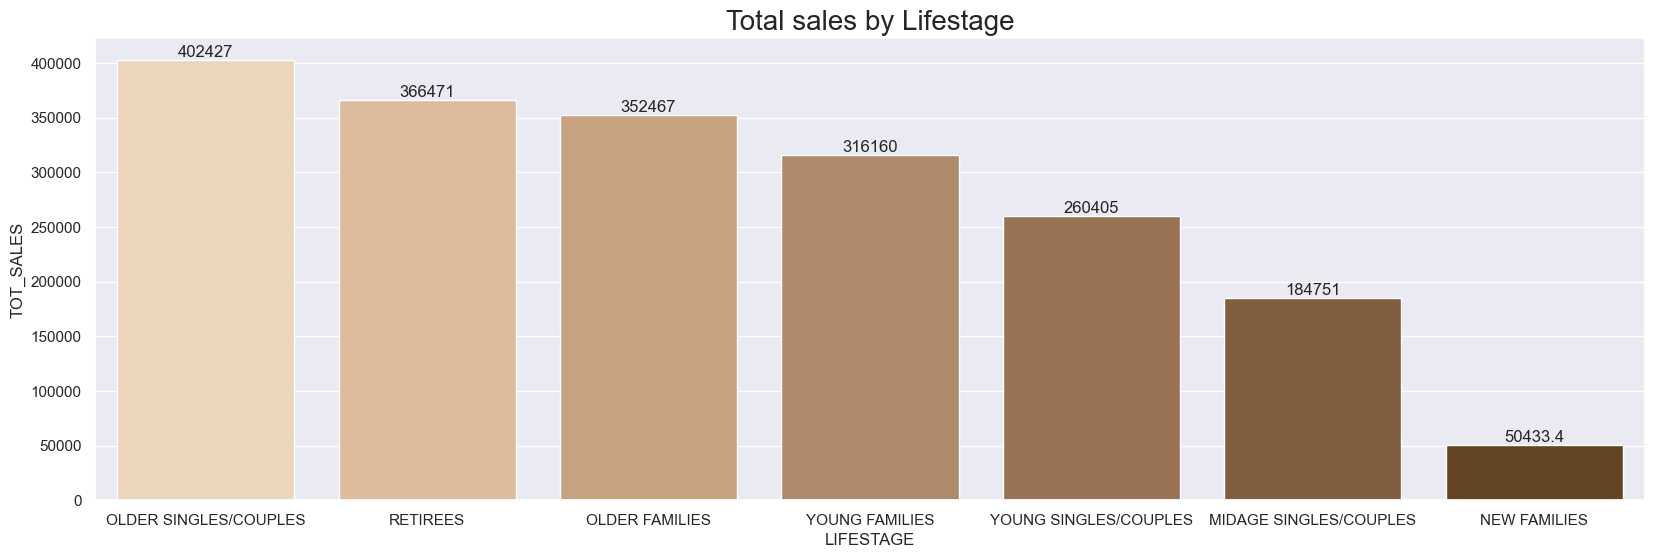

In [95]:
fig,ax1 = plt.subplots()
ax1 = sns.barplot(x=lifestage_totsales['LIFESTAGE'], y=lifestage_totsales['TOT_SALES'], palette=palette, order = lifestage_totsales['LIFESTAGE'])
for container in ax1.containers:
    ax1.bar_label(container)
plt.title('Total sales by Lifestage', size = 20)
plt.show()

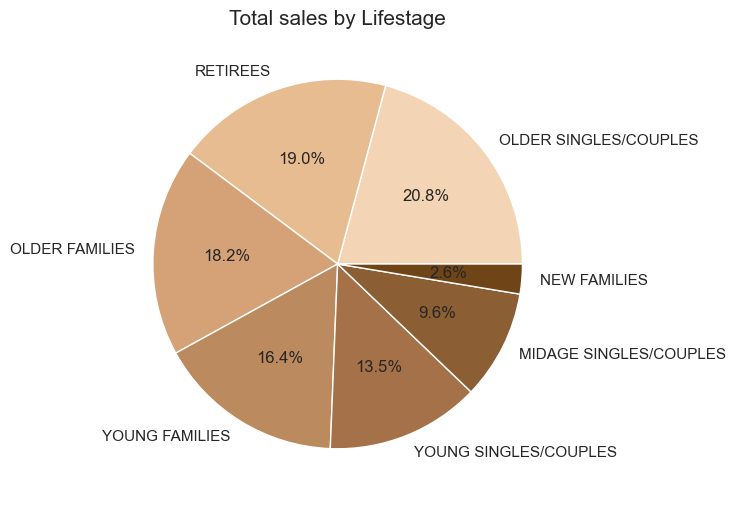

In [96]:
sns.set_palette(palette)
plt.pie(lifestage_totsales['TOT_SALES'], labels = lifestage_totsales['LIFESTAGE'].values,autopct='%.1f%%')
plt.title('Total sales by Lifestage', size = 15)
plt.show()

---

The Older Singles/Couples has the highest total sales during the period, following by Retirees and Older Families. This shows that the older age groups take a largest portion of all the chips sales.

I will analyse the monthly total sales by LIFESTAGE to identify potential trends.

---

In [97]:
merged['Month'] = merged['DATE'].dt.to_period('M').astype(str)

In [98]:
monthly_totsales = merged.groupby(['Month','LIFESTAGE'])['TOT_SALES'].sum().reset_index()
monthly_totsales

,Month,LIFESTAGE,TOT_SALES
0,2018-07,MIDAGE SINGLES/COUPLES,15917.4
1,2018-07,NEW FAMILIES,4150.1
2,2018-07,OLDER FAMILIES,30180.2
3,2018-07,OLDER SINGLES/COUPLES,34998.6
4,2018-07,RETIREES,30765.0
...,...,...,...
79,2019-06,OLDER FAMILIES,29018.5
80,2019-06,OLDER SINGLES/COUPLES,33476.9
81,2019-06,RETIREES,29512.6
82,2019-06,YOUNG FAMILIES,26268.9


<Axes: xlabel='Month', ylabel='TOT_SALES'>

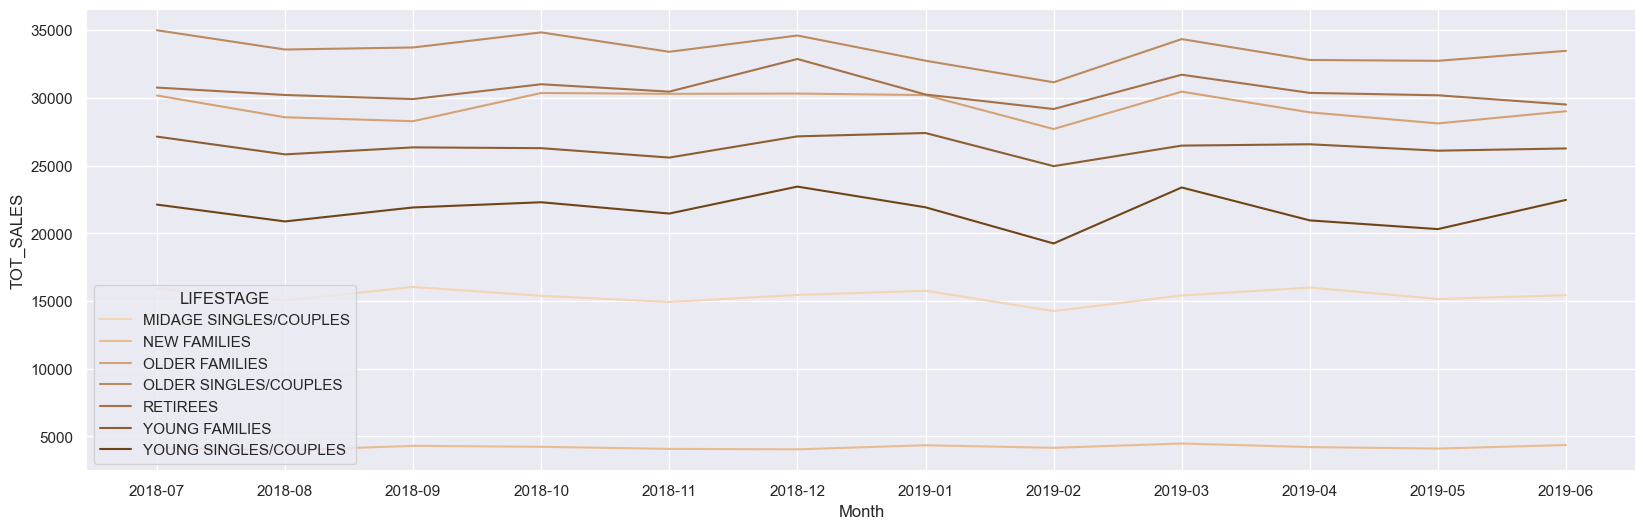

In [99]:
sns.lineplot(x=monthly_totsales['Month'], y = monthly_totsales['TOT_SALES'], hue = monthly_totsales['LIFESTAGE'])

---

The total sales each month over the period for each LIFESTAGE group does not fluctuate much and the total sales ranking are consistent. Hence, we can see that the chips sale is in the mature stage. Further market analysis can help to identify any opportunity for growth.

---

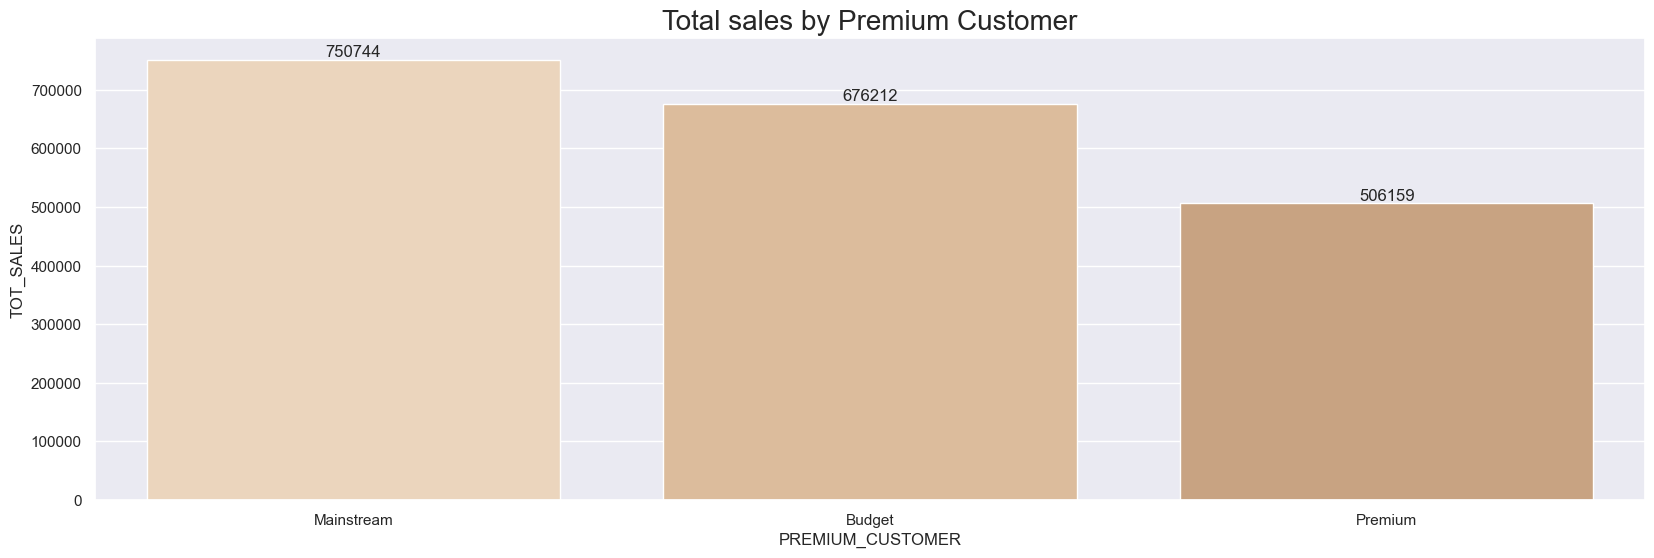

In [100]:
premium_totsales = merged.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()
premium_totsales = premium_totsales.sort_values(by='TOT_SALES', ascending = False)
fig,ax1 = plt.subplots()
ax1 = sns.barplot(x=premium_totsales['PREMIUM_CUSTOMER'], y=premium_totsales['TOT_SALES'], palette=palette, order = premium_totsales['PREMIUM_CUSTOMER'])
for container in ax1.containers:
    ax1.bar_label(container)
plt.title('Total sales by Premium Customer', size = 20)
plt.show()

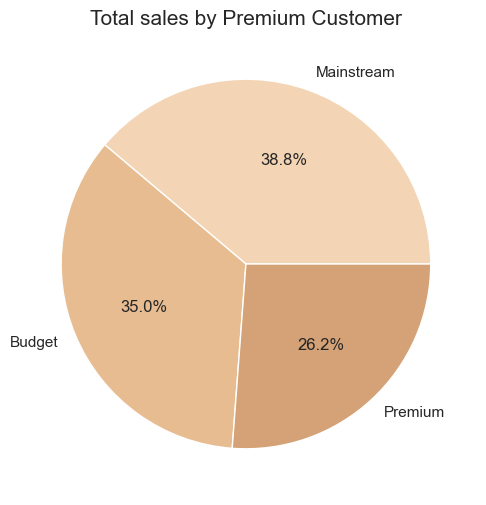

In [101]:
sns.set_palette(palette)
plt.pie(premium_totsales['TOT_SALES'], labels = premium_totsales['PREMIUM_CUSTOMER'].values,autopct='%.1f%%')
plt.title('Total sales by Premium Customer', size = 15)
plt.show()

---

Mainstream customers have the highest sales over the period. However, if we look at the sales distribution, the difference between the three PREMIUM_CUSTOMER group are not too large.

---

<Axes: xlabel='Month', ylabel='TOT_SALES'>

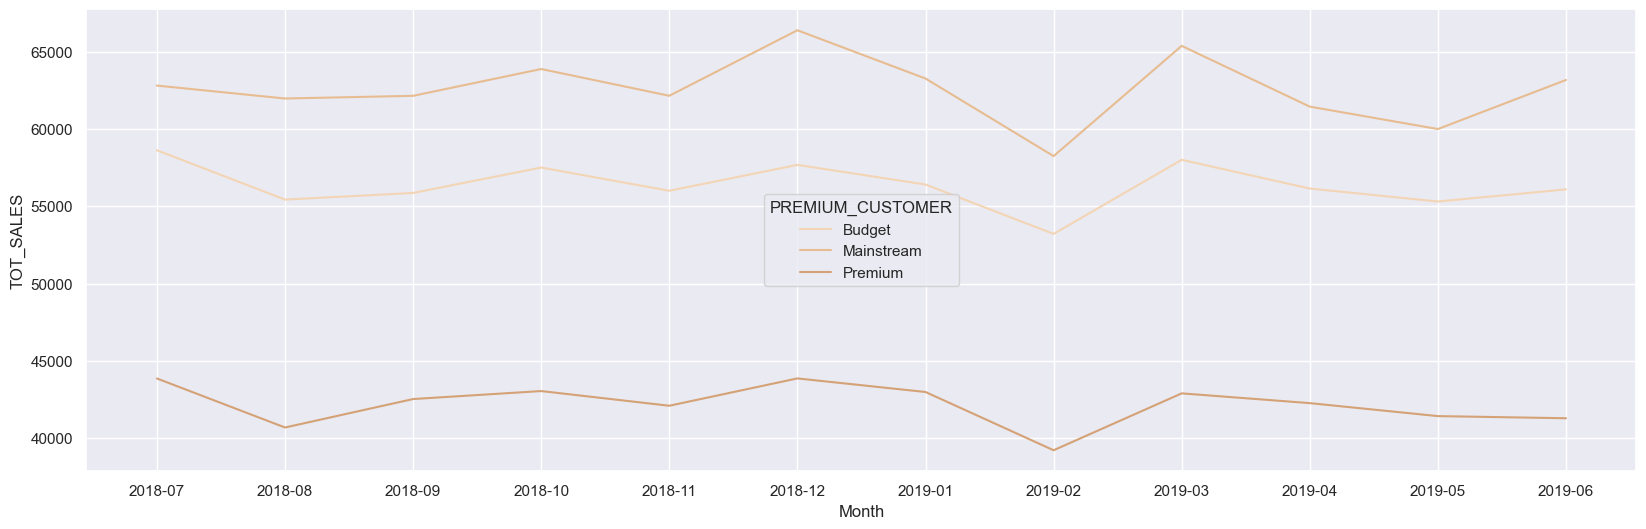

In [102]:
monthly_totsales2 = merged.groupby(['Month','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sns.lineplot(x=monthly_totsales2['Month'], y = monthly_totsales2['TOT_SALES'], hue = monthly_totsales2['PREMIUM_CUSTOMER'])

---

The chip sales by PREMIUM_CUSTOMER does not show any trend. We can see that most sales are from Mainstream and Premium customers have the lowest total sales. 

---

In [151]:
lifestage_prod_prep = merged[['LIFESTAGE','PROD_NAME','PROD_QTY']]
lifestage_prod = lifestage_prod_prep.groupby(['LIFESTAGE','PROD_NAME'])['PROD_QTY'].sum().reset_index()

In [152]:
top_brand=pd.DataFrame()
top_3 = []
for i in lifestage_prod['LIFESTAGE'].unique():
    top = lifestage_prod[lifestage_prod['LIFESTAGE']==i].sort_values(by = 'PROD_QTY', ascending = False).head(3)
    top_3.append(top)
top_brand = pd.concat(top_3, ignore_index=True)
top_brand

,LIFESTAGE,PROD_NAME,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Infzns Crn Crnchers Tangy Gcamole 110g,656
1,MIDAGE SINGLES/COUPLES,Cheezels Cheese 330g,640
2,MIDAGE SINGLES/COUPLES,Twisties Chicken 270g,638
3,NEW FAMILIES,Kettle Honey Soy Chicken 175g,197
4,NEW FAMILIES,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,197
5,NEW FAMILIES,Grain Waves Sweet Chilli 210g,195
6,OLDER FAMILIES,Smiths Crinkle Chips Salt & Vinegar 330g,1149
7,OLDER FAMILIES,Old El Paso Salsa Dip Chnky Tom Ht 300g,1129
8,OLDER FAMILIES,Thins Potato Chips Hot & Spicy 175g,1128
9,OLDER SINGLES/COUPLES,Kettle Swt Pot Sea Salt 135g,1417


---

The table above summarised the top 3 products bought by each LIFESTAGE category. We can see that both Retirees and Young Singles/Couples bought Kettle Mozzarella Basil & Pesto 175g the most.

---

In [105]:
premium_prod_prep = merged[['PREMIUM_CUSTOMER','PROD_NAME','PROD_QTY']]
premium_prod = premium_prod_prep.groupby(['PREMIUM_CUSTOMER','PROD_NAME'])['PROD_QTY'].sum().reset_index()

In [106]:
top_brand2=pd.DataFrame()
top_3_2 = []
for i in premium_prod['PREMIUM_CUSTOMER'].unique():
    top = premium_prod[premium_prod['PREMIUM_CUSTOMER']==i].sort_values(by = 'PROD_QTY', ascending = False).head(3)
    top_3_2.append(top)
top_brand2 = pd.concat(top_3_2, ignore_index=True)
top_brand2

,PREMIUM_CUSTOMER,PROD_NAME,PROD_QTY
0,Budget,Kettle Mozzarella Basil & Pesto 175g,2267
1,Budget,Doritos Corn Chip Southern Chicken 150g,2182
2,Budget,Doritos Corn Chips Cheese Supreme 170g,2175
3,Mainstream,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2611
4,Mainstream,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2511
5,Mainstream,Cobs Popd Sea Salt Chips 110g,2502
6,Premium,Infuzions Thai SweetChili PotatoMix 110g,1685
7,Premium,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,1662
8,Premium,Tostitos Splash Of Lime 175g,1661


---

The table above summarised the top 3 chips by PREMIUM_CUSTOMER segment. Cobs Popd Swt/Chlli &Sr/Cream Chips 110g is the top sale for both the Mainstream and Premium customers. Most Budget customers bought Kettle Mozzarella Basil & Pesto 175g.

---

In [107]:
top_sales_customer = merged[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']]
top_sales_customer = top_sales_customer.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].sum().reset_index()
top_sales_customer = top_sales_customer.sort_values(by='TOT_SALES', ascending = False)
top_sales_customer.head()

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES
2,Budget,OLDER FAMILIES,168363.25
13,Mainstream,YOUNG SINGLES/COUPLES,157621.60
11,Mainstream,RETIREES,155677.05
5,Budget,YOUNG FAMILIES,139345.85
3,Budget,OLDER SINGLES/COUPLES,136769.80


<Axes: xlabel='LIFESTAGE', ylabel='TOT_SALES'>

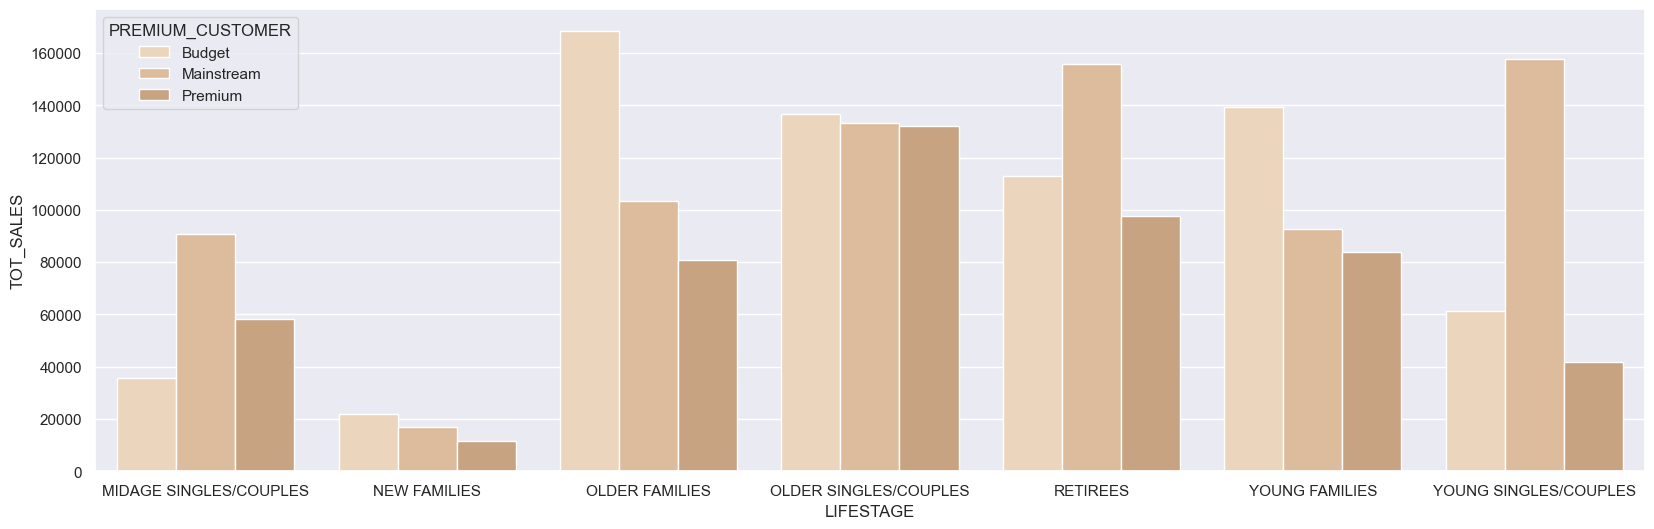

In [108]:
sns.barplot(x = 'LIFESTAGE',y='TOT_SALES',hue = 'PREMIUM_CUSTOMER', data = top_sales_customer)

In [109]:
top_qty_customer = merged[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_QTY']]
top_qty_customer = top_qty_customer.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['PROD_QTY'].sum().reset_index()
top_qty_customer = top_qty_customer.sort_values(by='PROD_QTY', ascending = False)
top_qty_customer.head()

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY
2,Budget,OLDER FAMILIES,45065
11,Mainstream,RETIREES,40518
13,Mainstream,YOUNG SINGLES/COUPLES,38632
5,Budget,YOUNG FAMILIES,37111
3,Budget,OLDER SINGLES/COUPLES,35220


<Axes: xlabel='LIFESTAGE', ylabel='PROD_QTY'>

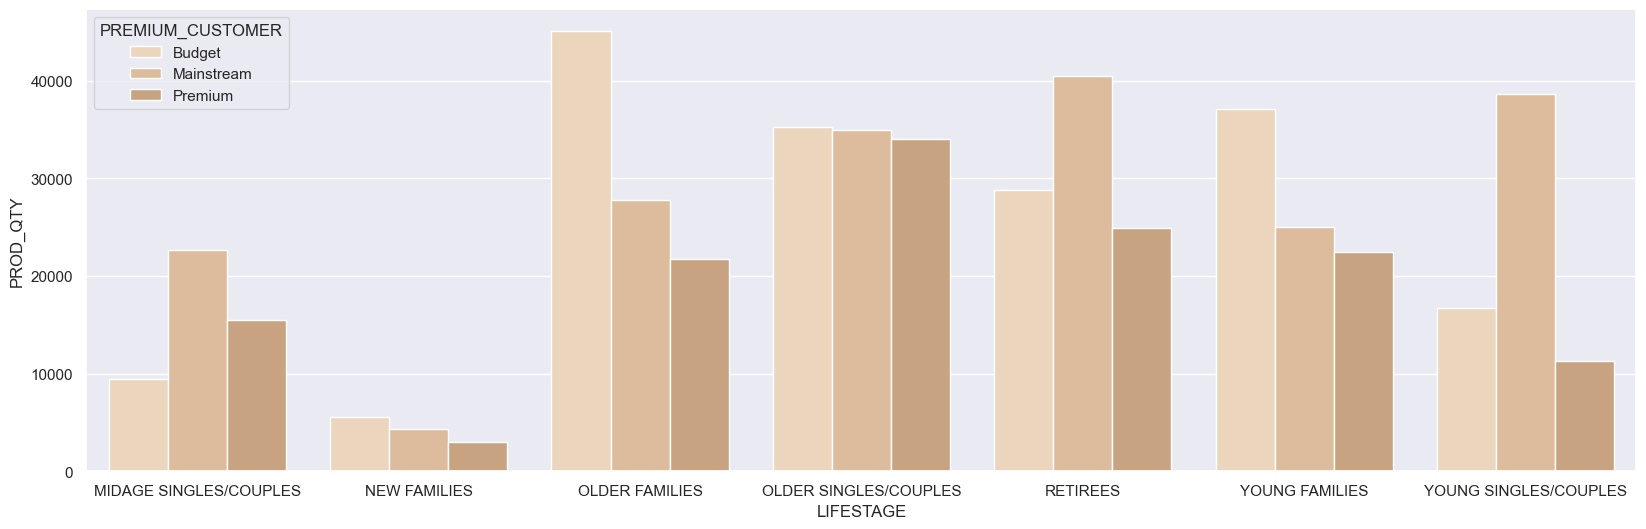

In [110]:
sns.barplot(x = 'LIFESTAGE',y='PROD_QTY',hue = 'PREMIUM_CUSTOMER', data = top_qty_customer)

---

Most sales (both revenue and quantity) are from Budget Older Families, Mainstream Young Singles/Couples and Mainstream Retirees.

---

In [168]:
top_prod_customer = merged[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_NAME','PROD_QTY']]
top_prod_customer = top_prod_customer.groupby(['PREMIUM_CUSTOMER','LIFESTAGE','PROD_NAME'])['PROD_QTY'].sum().reset_index()
top_prod_customer = top_prod_customer.sort_values(by='PROD_QTY', ascending = False)

In [169]:
top_3_3 = []
for i in top_prod_customer['PREMIUM_CUSTOMER'].unique():
    for j in top_prod_customer['LIFESTAGE'].unique():
        top = top_prod_customer[(top_prod_customer['PREMIUM_CUSTOMER']==i) & (top_prod_customer['LIFESTAGE']==j)].sort_values(by = 'PROD_QTY', ascending = False).head(3)
        top_3_3.append(top)
top_prod_customer = pd.concat(top_3_3, ignore_index=True)
top_prod_customer

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_NAME,PROD_QTY
0,Mainstream,YOUNG SINGLES/COUPLES,Kettle Mozzarella Basil & Pesto 175g,626
1,Mainstream,YOUNG SINGLES/COUPLES,Doritos Corn Chips Cheese Supreme 170g,621
2,Mainstream,YOUNG SINGLES/COUPLES,Tostitos Splash Of Lime 175g,619
3,Mainstream,OLDER FAMILIES,Old El Paso Salsa Dip Chnky Tom Ht 300g,356
4,Mainstream,OLDER FAMILIES,Cobs Popd Sour Crm &Chives Chips 110g,352
...,...,...,...,...
58,Premium,MIDAGE SINGLES/COUPLES,Pringles Chicken Salt Crips 134g,217
59,Premium,MIDAGE SINGLES/COUPLES,Infzns Crn Crnchers Tangy Gcamole 110g,207
60,Premium,NEW FAMILIES,Grain Waves Sweet Chilli 210g,59
61,Premium,NEW FAMILIES,Pringles Barbeque 134g,56


---

The table above summarise the top sales (by qty) product for each customer segment.

---

In [155]:
premium_sales_brand = merged[['PREMIUM_CUSTOMER','LIFESTAGE','Brand','PROD_QTY']]
premium_brand = premium_sales_brand.groupby(['PREMIUM_CUSTOMER','LIFESTAGE','Brand'])['PROD_QTY'].sum().reset_index()
premium_brand

,PREMIUM_CUSTOMER,LIFESTAGE,Brand,PROD_QTY
0,Budget,MIDAGE SINGLES/COUPLES,Burger,84
1,Budget,MIDAGE SINGLES/COUPLES,CCs,205
2,Budget,MIDAGE SINGLES/COUPLES,Cheetos,112
3,Budget,MIDAGE SINGLES/COUPLES,Cheezels,139
4,Budget,MIDAGE SINGLES/COUPLES,Cobs,345
...,...,...,...,...
457,Premium,YOUNG SINGLES/COUPLES,Thins,614
458,Premium,YOUNG SINGLES/COUPLES,Tostitos,386
459,Premium,YOUNG SINGLES/COUPLES,Twisties,359
460,Premium,YOUNG SINGLES/COUPLES,Tyrrells,236


In [157]:
top_brand3=pd.DataFrame()
top_3_2 = []
for i in premium_brand['PREMIUM_CUSTOMER'].unique():
    for j in premium_brand['LIFESTAGE'].unique():
        top = premium_brand[(premium_brand['PREMIUM_CUSTOMER']==i)&(premium_brand['LIFESTAGE']==j)].sort_values(by = 'PROD_QTY', ascending = False).head(3)
        top_3_2.append(top)
top_brand3 = pd.concat(top_3_2, ignore_index=True)
top_brand3

,PREMIUM_CUSTOMER,LIFESTAGE,Brand,PROD_QTY
0,Budget,MIDAGE SINGLES/COUPLES,Kettle,1365
1,Budget,MIDAGE SINGLES/COUPLES,Smiths,1060
2,Budget,MIDAGE SINGLES/COUPLES,Doritos,1023
3,Budget,NEW FAMILIES,Kettle,954
4,Budget,NEW FAMILIES,Doritos,643
...,...,...,...,...
58,Premium,YOUNG FAMILIES,Smiths,2523
59,Premium,YOUNG FAMILIES,Doritos,2172
60,Premium,YOUNG SINGLES/COUPLES,Kettle,1566
61,Premium,YOUNG SINGLES/COUPLES,Smiths,1327


---

The table above summarise the top sales (by qty) brand for each customer segment.

---

In [114]:
avg_sales = merged.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].mean().reset_index()
avg_sales = avg_sales.rename(columns = {'TOT_SALES':'AVG_SALES'})
avg_sales = avg_sales.sort_values(by='AVG_SALES', ascending = False)
avg_sales

,PREMIUM_CUSTOMER,LIFESTAGE,AVG_SALES
7,Mainstream,MIDAGE SINGLES/COUPLES,7.647284
13,Mainstream,YOUNG SINGLES/COUPLES,7.558339
18,Premium,RETIREES,7.456174
17,Premium,OLDER SINGLES/COUPLES,7.449766
4,Budget,RETIREES,7.443445
3,Budget,OLDER SINGLES/COUPLES,7.430315
8,Mainstream,NEW FAMILIES,7.317806
1,Budget,NEW FAMILIES,7.297321
5,Budget,YOUNG FAMILIES,7.287201
10,Mainstream,OLDER SINGLES/COUPLES,7.282116


<Axes: xlabel='LIFESTAGE', ylabel='AVG_SALES'>

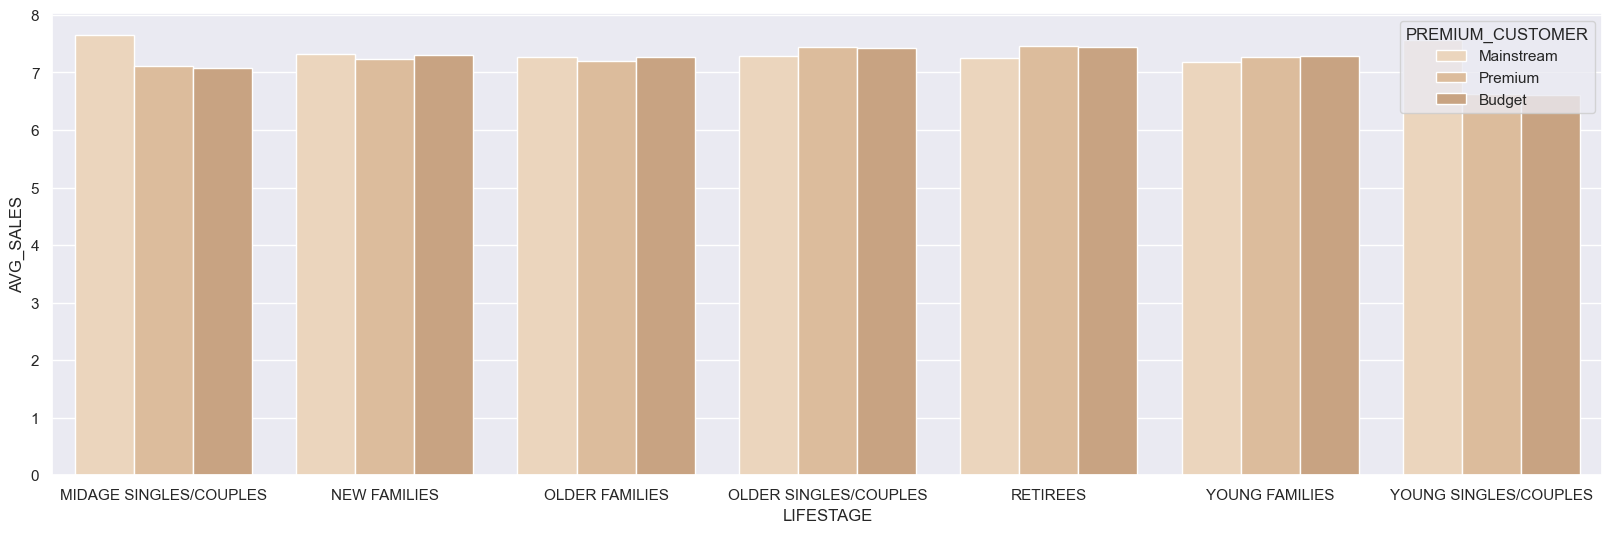

In [121]:
sns.barplot(x = 'LIFESTAGE',y='AVG_SALES',hue = 'PREMIUM_CUSTOMER', data = avg_sales)

In [115]:
avg_price = merged.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['Price'].mean().reset_index()
avg_price = avg_price.rename(columns = {'Price':'AVG_PRICE'})
avg_price = avg_price.sort_values(by='AVG_PRICE', ascending = False)
avg_price

,PREMIUM_CUSTOMER,LIFESTAGE,AVG_PRICE
13,Mainstream,YOUNG SINGLES/COUPLES,4.071485
7,Mainstream,MIDAGE SINGLES/COUPLES,4.000101
4,Budget,RETIREES,3.924883
18,Premium,RETIREES,3.921323
1,Budget,NEW FAMILIES,3.919251
8,Mainstream,NEW FAMILIES,3.916581
17,Premium,OLDER SINGLES/COUPLES,3.887220
3,Budget,OLDER SINGLES/COUPLES,3.877022
15,Premium,NEW FAMILIES,3.871743
11,Mainstream,RETIREES,3.833343


In [148]:
pivot_tb = avg_price.pivot(index='PREMIUM_CUSTOMER',columns='LIFESTAGE', values='AVG_PRICE')
pivot_tb.to_csv('avg_price.csv')

---

Mainstream Midage Singles/Couples has the highest average sales over the period following by Mainstream Young Singles/Couples. 

Mainstream Midage Singles/Couples and Mainstream Young Singles/Couples also are the customer segment that are willing to pay a higher price for chips.


Mainstream Young Singles/Couples is a good customer segment to target, as they are willing to pay a premium price for chips and are among the top 5 segments with the highest sales quantities.

---

In [160]:
top_brand3[(top_brand3['PREMIUM_CUSTOMER']=='Mainstream')&(top_brand3['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]

,PREMIUM_CUSTOMER,LIFESTAGE,Brand,PROD_QTY
39,Mainstream,YOUNG SINGLES/COUPLES,Kettle,7172
40,Mainstream,YOUNG SINGLES/COUPLES,Doritos,4747
41,Mainstream,YOUNG SINGLES/COUPLES,Pringles,4326


In [188]:
target = merged[(merged['PREMIUM_CUSTOMER']=='Mainstream')&(merged['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
target_brand = target.groupby(['Brand'])['PROD_QTY'].sum().reset_index().sort_values(by='PROD_QTY', ascending = False)
target_brand['Brand'].to_list()

['Kettle',
 'Doritos',
 'Pringles',
 'Smiths',
 'Infuzions',
 'Thins',
 'Red',
 'Twisties',
 'Tostitos',
 'Cobs',
 'Old',
 'GrnWves',
 'Tyrrells',
 'Woolworths',
 'Natural',
 'Cheezels',
 'CCs',
 'Cheetos',
 'Smith',
 'Sunbites',
 'French',
 'Burger']

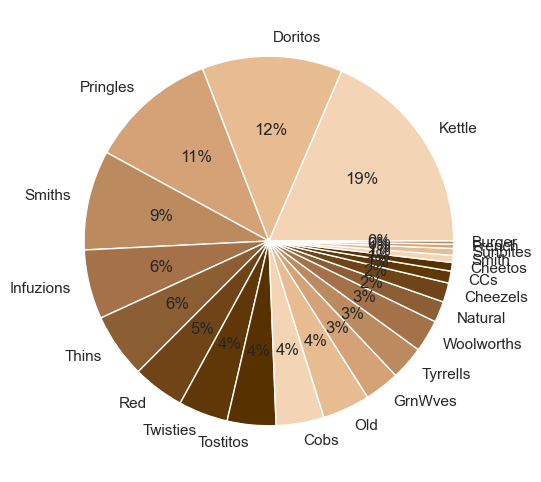

In [194]:
label_brand=['Kettle',
 'Doritos',
 'Pringles',
 'Smiths',
 'Infuzions',
 'Thins',
 'Red',
 'Twisties',
 'Tostitos',
 'Cobs',
 'Old',
 'GrnWves',
 'Tyrrells',
 'Woolworths',
 'Natural',
 'Cheezels',
 'CCs',
 'Cheetos',
 'Smith',
 'Sunbites',
 'French',
 'Burger']
plt.pie(data=target_brand, x = 'PROD_QTY',labels=label_brand,autopct='%.0f%%')
plt.show()

In [220]:
prods_3 = top_prod_customer[(top_prod_customer['PREMIUM_CUSTOMER']=='Mainstream')&(top_prod_customer['LIFESTAGE']=="YOUNG SINGLES/COUPLES")]
prods_3

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_NAME,PROD_QTY
0,Mainstream,YOUNG SINGLES/COUPLES,Kettle Mozzarella Basil & Pesto 175g,626
1,Mainstream,YOUNG SINGLES/COUPLES,Doritos Corn Chips Cheese Supreme 170g,621
2,Mainstream,YOUNG SINGLES/COUPLES,Tostitos Splash Of Lime 175g,619


---

Most of the chip sales to Mainstream Young Singles/Couples customers are from Kettle (19%), particularly the Kettle Mozzarella Basil & Pesto 175g. 

---

In [228]:
prod_prices = merged.groupby('PROD_NAME')['Price'].mean().reset_index()
prod_prices.describe()

,Price
count,114.000000
mean,3.490819
std,1.134291
min,1.500000
25%,2.700000
50%,3.300000
75%,4.399829
max,6.368285


In [225]:
price_topprod = []
for i in prods_3['PROD_NAME']:
    price = merged[merged['PROD_NAME']==i]['Price'].mean().round(3)
    price_topprod.append(price)
prods_3['Price']=price_topprod
prods_3

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_NAME,PROD_QTY,Price
0,Mainstream,YOUNG SINGLES/COUPLES,Kettle Mozzarella Basil & Pesto 175g,626,5.400
1,Mainstream,YOUNG SINGLES/COUPLES,Doritos Corn Chips Cheese Supreme 170g,621,4.399
2,Mainstream,YOUNG SINGLES/COUPLES,Tostitos Splash Of Lime 175g,619,4.400


---

Mainstream Young Singles/Couples customers' top 3 most purchased products are all priced above $4.40, placing them in the upper 25\% of 114 chip products.

---